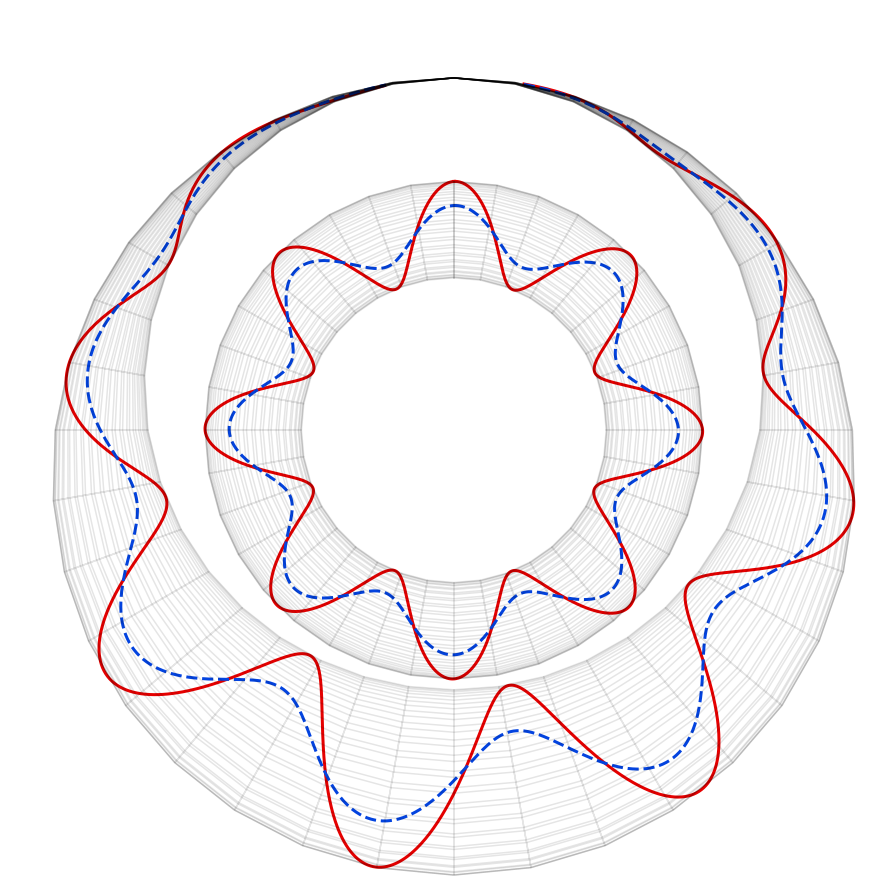

In [6]:
import datetime
import heliosat
import matplotlib
import numpy as np
import py3dcore
import pickle

from matplotlib import pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import Axes3D
from py3dcore.rotqs import _numba_quaternion_rotate
from scipy.optimize import least_squares

rc('font', **{'family':'sans-serif','sans-serif':['Helvetica'], 'size': 28, 'weight': 'normal'})
rc('text', usetex=True)

c0 = "xkcd:black"
c1 = "xkcd:magenta"
c2 = "xkcd:orange"
c3 = "xkcd:azure"


if __name__ == "__main__":
    t_l = datetime.datetime(2018, 1, 1)

    iparams_arr = np.array([[
            0,      # t0
            0,      # l_1
            0,      # l_2
            0,      # o, tilt
            0.22,   # d_1au
            1,      # delta
            20,     # r_0
            950,    # v_0
            8,      # tau
            1,      # b_s
            17,     # b_1au
            0.5,    # gamma
            450,    # v_sw
            0       # sigma
        ]], dtype=np.float32)
    
    # torus
    model_obj = py3dcore.models.TTGHv0(t_l, runs=1, use_gpu=False)
    model_obj.update_iparams(iparams_arr, seed=42)
    model_obj.propagate(t_l + datetime.timedelta(hours=48))

    wf_model = model_obj.visualize_wireframe(index=0)
    
    # magnetic field
    mq0 = np.array([1, 0, 0], dtype=np.float32)
    fieldlines = model_obj.visualize_fieldline_dpsi(mq0, 2 * np.pi, step_size=0.005)
    
    mq02 = np.array([.5, 0, 0], dtype=np.float32)
    fieldlines2 = model_obj.visualize_fieldline_dpsi(mq02, 2 * np.pi, step_size=0.005)
    
    fig = plt.figure(figsize=(16, 16 ))
    ax = fig.gca(projection='3d')
    
    wf_model[:, :, 0] -= model_obj.sparams_arr[0][2]
    fieldlines[:, 0] -= model_obj.sparams_arr[0][2]
    fieldlines2[:, 0] -= model_obj.sparams_arr[0][2]
    
    ax.plot(fieldlines[:, 0], fieldlines[:, 1], fieldlines[:, 2],    color="xkcd:red", ls="-", lw=3)
    ax.plot(fieldlines2[:, 0], fieldlines2[:, 1], fieldlines2[:, 2], color="xkcd:blue", ls="--", lw=3)
    ax.plot_wireframe(wf_model[:, :, 0], wf_model[:, :, 1], wf_model[:, :, 2], color="k", alpha=.1, lw=1.5)
    
    # thin torus
    model_obj2 = py3dcore.models.TTGHv1(t_l, runs=1, use_gpu=False)
    model_obj2.update_iparams(iparams_arr, seed=42)
    model_obj2.propagate(t_l + datetime.timedelta(hours=100))

    wf_model2 = model_obj2.visualize_wireframe(index=0)
    
    # magnetic field
    mq03 = np.array([1, .2, 0], dtype=np.float32)
    fieldlines3 = model_obj2.visualize_fieldline_dpsi(mq03, 2 * np.pi - .4, step_size=0.005)
    
    mq04 = np.array([.5, .2, 0], dtype=np.float32)
    fieldlines4 = model_obj2.visualize_fieldline_dpsi(mq04, 2 * np.pi - .4, step_size=0.005)

    wf_model2[:, :, 0] -= model_obj2.sparams_arr[0][2]
    fieldlines3[:, 0] -= model_obj2.sparams_arr[0][2]
    fieldlines4[:, 0] -= model_obj2.sparams_arr[0][2]

    ax.plot(fieldlines3[:, 0], fieldlines3[:, 1], fieldlines3[:, 2], color="xkcd:red", ls="-", lw=3)
    ax.plot(fieldlines4[:, 0], fieldlines4[:, 1], fieldlines4[:, 2], color="xkcd:blue", ls="--", lw=3)
    ax.plot_wireframe(wf_model2[:, :, 0], wf_model2[:, :, 1], wf_model2[:, :, 2], color="k", alpha=.1, lw=1.5)

    ax.set_axis_off()
    ax.view_init(elev=90, azim=0)
    ax.set_xlim([-.5, .5])
    ax.set_ylim([-.5, .5])
    ax.set_zlim([-.5, .5])